In [1]:
import gurobi as gb
import networkx as nx
import matplotlib.pyplot as plt
import random

from networkx import bipartite
from IPython.display import SVG

In [2]:
random.seed(9)

In [20]:
candidate_location_nb = 5
demand_nb = 15

G = bipartite.random_graph(candidate_location_nb, demand_nb, 1)


# distance = {}
# cost = {i: }
# demand = {}

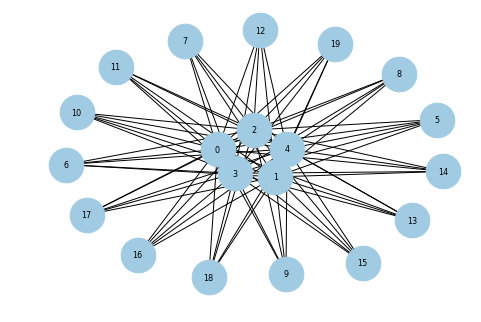

In [21]:
%matplotlib inline
pos = nx.spring_layout(G)
nx.draw(G,pos, node_color='#A0CBE2', width=1, node_size=1200, 
        with_labels=True, hold=None, font_size=8)

In [22]:
c_nodes, d_nodes = bipartite.sets(G)

In [23]:
min_demand = 100
max_demand = 500

min_fixed_charge = 1000
max_fixed_charge = 10000

min_distance = 50
max_distance = 100

min_D = 60
max_D = 80    

def generate_variables(G):
    demand = {i: random.randint(min_demand, max_demand) for i in d_nodes}
    nx.set_node_attributes(G, demand, name="demand")

    fixed_charge = {i: random.randint(min_fixed_charge, max_fixed_charge) \
                    for i in c_nodes}
    nx.set_node_attributes(G, fixed_charge, name="fixed charge")

    distance = {(i,j): random.randint(min_distance, max_distance) \
                for i, j in G.edges}
    nx.set_edge_attributes(G, distance, name="distance")

    D = {i: random.randint(min_D, max_D) for i in d_nodes}
    nx.set_node_attributes(G, D, name="D")

    v = random.randint(10, 50)


In [24]:
G.nodes(data=True)

NodeDataView({0: {'bipartite': 0}, 1: {'bipartite': 0}, 2: {'bipartite': 0}, 3: {'bipartite': 0}, 4: {'bipartite': 0}, 5: {'bipartite': 1}, 6: {'bipartite': 1}, 7: {'bipartite': 1}, 8: {'bipartite': 1}, 9: {'bipartite': 1}, 10: {'bipartite': 1}, 11: {'bipartite': 1}, 12: {'bipartite': 1}, 13: {'bipartite': 1}, 14: {'bipartite': 1}, 15: {'bipartite': 1}, 16: {'bipartite': 1}, 17: {'bipartite': 1}, 18: {'bipartite': 1}, 19: {'bipartite': 1}})

In [25]:
generate_variables(G)

In [26]:
i = min(d_nodes)
while i in d_nodes:
    min_d = max_demand
    for u, v in G.edges(i):
        print(u,v, G[u][v]["distance"], G.nodes[i]["D"])
        min_d = G[u][v]["distance"] if G[u][v]["distance"] < min_d else min_d
    print()
    if min_d > G.nodes[i]["D"]:
        print("############# not_correct")
        i = min(d_nodes) - 1
        generate_variables(G)
    i+=1

5 0 78 76
5 1 59 76
5 2 50 76
5 3 61 76
5 4 65 76

6 0 82 64
6 1 63 64
6 2 96 64
6 3 94 64
6 4 60 64

7 0 51 64
7 1 100 64
7 2 64 64
7 3 91 64
7 4 90 64

8 0 53 76
8 1 73 76
8 2 66 76
8 3 100 76
8 4 55 76

9 0 97 63
9 1 57 63
9 2 69 63
9 3 96 63
9 4 87 63

10 0 51 76
10 1 85 76
10 2 80 76
10 3 88 76
10 4 58 76

11 0 76 62
11 1 75 62
11 2 67 62
11 3 53 62
11 4 72 62

12 0 57 72
12 1 58 72
12 2 52 72
12 3 99 72
12 4 62 72

13 0 57 75
13 1 66 75
13 2 72 75
13 3 88 75
13 4 70 75

14 0 90 75
14 1 70 75
14 2 89 75
14 3 71 75
14 4 91 75

15 0 77 68
15 1 52 68
15 2 68 68
15 3 63 68
15 4 79 68

16 0 99 77
16 1 94 77
16 2 62 77
16 3 79 77
16 4 71 77

17 0 92 60
17 1 100 60
17 2 53 60
17 3 88 60
17 4 52 60

18 0 77 71
18 1 67 71
18 2 69 71
18 3 95 71
18 4 73 71

19 0 84 80
19 1 93 80
19 2 63 80
19 3 94 80
19 4 89 80



In [27]:
for i in d_nodes:
    min_d = max_demand
    for _,j in G.edges(i):
        min_d = G[i][j]["distance"] if G[i][j]["distance"] < min_d else min_d
    if min_d < G.nodes[i]["D"]:
        print("correct")
    else:
        print("min_d = ", min_d, "but D =", G.nodes[i]["D"])
        

correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
